# 1. Preparation

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Setting option
pd.set_option('display.max_columns', 30)

In [3]:
# Importing data
book_tag = pd.read_csv('datasets/book_tags.csv')
books = pd.read_csv('datasets/books.csv')
ratings = pd.read_csv('datasets/ratings.csv')
tags = pd.read_csv('datasets/tags.csv')
to_read = pd.read_csv('datasets/to_read.csv')

In [4]:
book_tag.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [5]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


# 2. Data Cleaning & EDA

## 2.1. Book_Tag Data

In [9]:
book_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
goodreads_book_id    999912 non-null int64
tag_id               999912 non-null int64
count                999912 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


In [10]:
book_tag.describe()

,goodreads_book_id,tag_id,count
count,9.999120e+05,999912.000000,999912.000000
mean,5.263442e+06,16324.527073,208.869633
std,7.574057e+06,9647.846196,3501.265173
min,1.000000e+00,0.000000,-1.000000
25%,4.622700e+04,8067.000000,7.000000
50%,3.948410e+05,15808.000000,15.000000
75%,9.378297e+06,24997.000000,40.000000
max,3.328864e+07,34251.000000,596234.000000


In [11]:
# Looking for null value within the data
book_tag.isna().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [12]:
# Counting unique value for each feature
book_tag.nunique()

goodreads_book_id    10000
tag_id               34252
count                 9401
dtype: int64

Looking at the summary above, I did not notice anything peculiar with the data and there were no missing data. There are exactly 10,000 book ID since there are 10,000 books in our data. Next, I check whether there are duplicate data.

In [13]:
# Looking for duplicate data
book_tag[book_tag.duplicated(keep = False)]

,goodreads_book_id,tag_id,count
159370,22369,25148,4
159371,22369,25148,4
265127,52629,10094,1
265128,52629,10094,1
265139,52629,2928,1
265140,52629,2928,1
265154,52629,13272,1
265155,52629,13272,1
265186,52629,13322,1
265187,52629,13322,1


There were some duplicates in our dataset. I will drop these duplicate data.

In [14]:
# Dropping duplicate data
book_tag.drop_duplicates(keep = 'first', inplace = True)

In [15]:
# Rechecking if there were still duplicate data
book_tag[book_tag.duplicated(keep = False)]

,goodreads_book_id,tag_id,count


There were no duplicate data. Next, I will analyze books.csv

## 2.2. Books Data

In [16]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

In [17]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [18]:
books.describe(exclude = 'number')

,isbn,authors,original_title,title,language_code,image_url,small_image_url
count,9300,10000,9415,10000,8916,10000,10000
unique,9300,4664,9274,9964,25,6669,6669
top,62311115,Stephen King,The Gift,Selected Poems,eng,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
freq,1,60,5,4,6341,3332,3332


### 2.2.1. book_id, goodreads_book_id, best_book_id, work_id

Below is brief explanation regarding differences betweed IDs:
- **book_id:** ID's of the books with a particular title (one title with different editions will only have one book_id)
- **goodreads_book_id:** ID's of the books with a particular title and edition (one title with 10 different editions will have 10 different goodreads_book_id) 
- **best_book_id:** ID's of the books which on 'Best Books Ever' list. Usually the same as goodreads_book_id
- **work_id:** ID's of the books. A Work refers to the abstract version of a book that isn't tied to any particular edition or translation. 

In [19]:
# Counting unique value for each feature
books[['book_id', 'goodreads_book_id', 'best_book_id', 'work_id']].nunique()

book_id              10000
goodreads_book_id    10000
best_book_id         10000
work_id              10000
dtype: int64

Looking at the summary above, all the IDs have exactly 10,000 unique values since there are 10,000 books in our data. Next, I just want to check how many books having different goodreads_book_id and best_book_id

In [20]:
# Counting how many books having different goodreads_book_id and best_book_id
total = books[books['goodreads_book_id'] != books['best_book_id']]['book_id'].count()
print(f'In total, there are {total} books having different goodreads_book_id and best_book_id')

In total, there are 241 books having different goodreads_book_id and best_book_id


### 2.2.2. books_count

Books_count refers to how many editions have been published for that particular title. I will check distribution of this feature.

Text(0.5, 1.0, 'Distribution of Books Count')

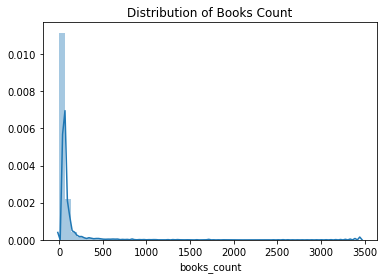

In [21]:
# Distribution of books count
sns.distplot(books['books_count'])
plt.title('Distribution of Books Count')

It looks like there are books that have been published with almost 3500 editions. I will look into these data.

Text(0.5, 1.0, 'Distribution of Original Publication Year for Books with Books Count more than 1000')

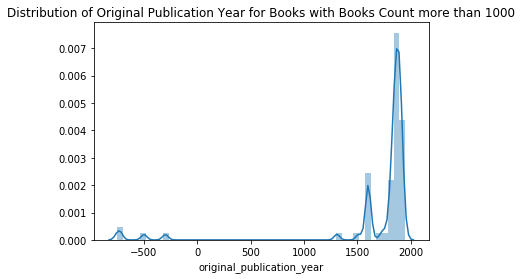

In [22]:
# Distribution of original publication year for books with books count more than 1000 
sns.distplot(books[books['books_count'] > 1000]['original_publication_year'].dropna())
plt.title('Distribution of Original Publication Year for Books with Books Count more than 1000')

Text(0.5, 1.0, 'Distribution of Original Publication Year for Books with Books Count more than 2000')

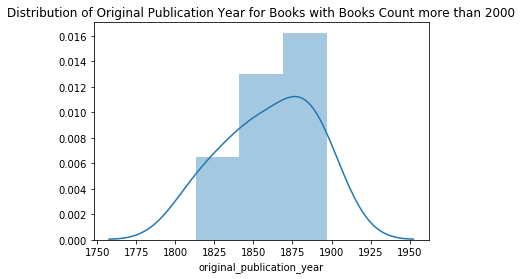

In [23]:
# Distribution of original publication year for books with books count more than 1000 
sns.distplot(books[books['books_count'] > 2000]['original_publication_year'].dropna())
plt.title('Distribution of Original Publication Year for Books with Books Count more than 2000')

Looking at the chart above, it seems that most of the books that have many editions were published before 1900. I assume that this makes sense if a book have many editions (including reprint, translation to another language, etc.) in a span of more than 100 years.

### 2.2.3. isbn, isbn13

ISBN (International Standard Book Numbers) is a numeric commercial book identifier which is intended to be unique. There is specific format for ISBN and ISBN13. I will look into the data to check this. 'isbn' feature refers to ISBN10 which is a 10-digit number. Looking at description of the data, it seems that not all ISBNs have 10 digits. I will look into this and fix it.

In [24]:
# Looking into data with 'isbn' feature consists of non-10-digit number
books[books['isbn'].apply(lambda x: len(str(x)) != 10)]['isbn']

0       439023483
1       439554934
2       316015849
3        61120081
4       743273567
5       525478817
6       618260307
7       316769177
9       679783261
11       62024035
12      451524934
13      452284244
14      553296981
15      307269752
16      439023491
18      618346252
19      439023513
20      439358078
21      316166685
22      439064864
23      439139600
24      545010225
25      307277674
26      439785960
27      140283331
28      743477111
29      297859382
30      399155341
31      142000671
32      739326228
          ...    
9964     60182989
9965    312254997
9966          NaN
9967     60005777
9969    676979564
9970          NaN
9971     99282968
9972    609805797
9973    553153382
9975    778325806
9976    804113475
9977    679750150
9978    312940661
9979    764200739
9980    739455834
9981    385344422
9983    140255087
9984    425176932
9985    310257689
9986    312651198
9987    674017722
9988          NaN
9989    140143912
9990    385425139
9991    57

Looking at above summary and after checking, it seems that all leading zeros were omitted and that made 'isbn' feature did not follow ISBN10 format (10-digit number). I will add zeros to the ISBN.

In [25]:
# Adding zeros to 'isbn' feature
def isbn10(data):
    try:
        if len(data) != 10:
            return ('0' * (10 - len(data))) + data
        else:
            return data
    except:
        return data

books['isbn'] = books['isbn'].apply(isbn10)

In [26]:
# Rechecking 'isbn' feature consists of non-10-digit number
books[books['isbn'].apply(lambda x: len(str(x)) != 10)]['isbn'].unique()

array([nan], dtype=object)

There were no more data on 'isbn' feature which are non-10-digit number. Next, I look into 'isbn13' feature. 'isbn13' feature refers to ISBN13 which is a 13-digit number. Looking at description of the data, it seems that not all ISBN13s have 13 digits. I will look into this and fix it. First, I will change the data types into object.

In [27]:
# Changing data types into object
books['isbn13'] = books['isbn13'].astype('object')

In [28]:
# Get rid of the '.0' within the 'isbn13' feature
def change_type(data):
    try:
        return str(int(data))
    except:
        return data

books['isbn13'] = books['isbn13'].apply(change_type)

In [29]:
# Looking into data with 'isbn' feature consists of non-13-digit number
books[books['isbn13'].apply(lambda x: len(str(x)) != 13)]['isbn13'].unique()

array([nan, '76783609419', '97893806587', '645573003012', '630809681058',
       '635517080452', '25986247522', '31809014745', '195170342'],
      dtype=object)

After checking, it seems that the case is the same with 'isbn' feature where all leading zeros were omitted and that made 'isbn13' feature did not follow ISBN13 format (13-digit number). I will add zeros to the ISBN13.

In [30]:
# Adding zeros to 'isbn13' feature
def isbn13(data):
    try:
        if len(data) != 13:
            return ('0' * (13 - len(data))) + data
        else:
            return data
    except:
        return data

books['isbn13'] = books['isbn13'].apply(isbn13)

In [31]:
# Rechecking 'isbn' feature consists of non-13-digit number
books[books['isbn13'].apply(lambda x: len(str(x)) != 13)]['isbn13'].unique()

array([nan], dtype=object)

There were no more data on 'isbn13' feature which are non-13-digit number. Next, I check into missing data of these 2 features. From the summary of the data, there seems to be missing values within these two features. I will look into this.

In [32]:
# looking into books having null values for both the 'isbn' and 'isbn13' features
total = books[books['isbn'].isna() & books['isbn13'].isna()]['book_id'].count()
print(f'In total, there are {total} books not having ISBN and ISBN13')

In total, there are 565 books not having ISBN and ISBN13


It seems that small amount of the books did not have ISBN. I will look into this to see if there are similarities between books without ISBN.

In [33]:
books[books['isbn'].isna() & books['isbn13'].isna()]['authors'].value_counts()

Kristen Ashley                           19
Abbi Glines                              18
Colleen Hoover                            9
Hugh Howey                                8
George R.R. Martin                        5
Tijan                                     5
R.K. Lilley                               5
Tarryn Fisher                             5
Sarah J. Maas                             5
A.G. Riddle                               4
Brandon Sanderson                         4
Samantha Young                            4
Christina Lauren                          4
Emma Chase                                4
Jennifer L. Armentrout                    4
Mariana Zapata                            4
Bella Forrest                             4
Jamie McGuire                             4
Aurora Rose Reynolds                      3
Lee Child                                 3
Whitney G.                                3
Jodi Ellen Malpas                         3
Tillie Cole                     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

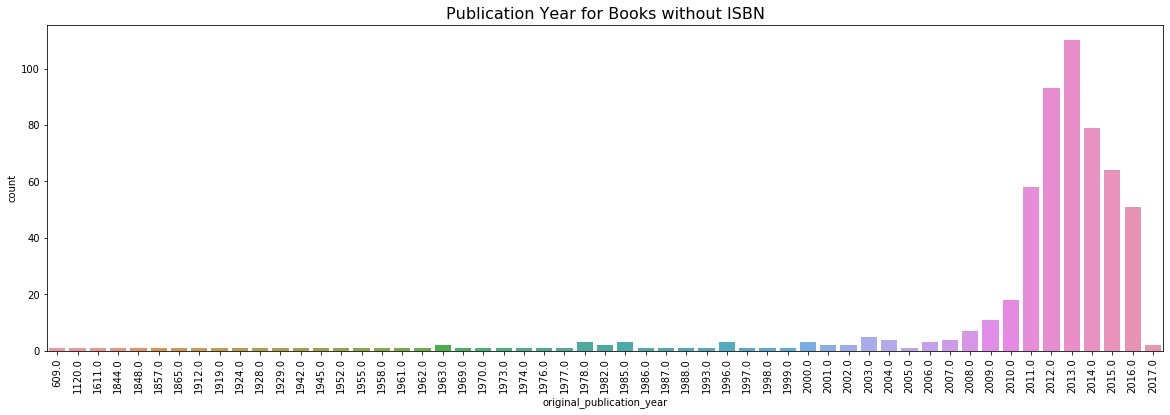

In [34]:
# Distribution of publication year for books without ISBN
plt.figure(figsize = (20, 6))
sns.countplot(books[books['isbn'].isna() & books['isbn13'].isna()]['original_publication_year'])
plt.title('Publication Year for Books without ISBN', fontsize = 16)
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Average Rating for Books without ISBN')

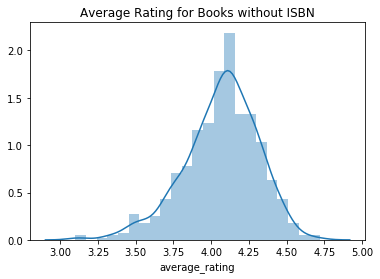

In [35]:
# Average rating of books without ISBN
sns.distplot(books[books['isbn'].isna() & books['isbn13'].isna()]['average_rating'])
plt.title('Average Rating for Books without ISBN')

Looking at the exploration above, there is no obvious pattern for books without ISBN. They were simply not registered using ISBN since this code is not mandatory. Next, I look into books that only have either isbn or isbn13.

In [36]:
# looking into books having null values either on 'isbn' or 'isbn13' features
total = books[(books['isbn'].isna() | books['isbn13'].isna()) & ~(books['isbn'].isna() & books['isbn13'].isna())]['book_id'].count()
print(f'In total, there are {total} books either not having ISBN or ISBN13')

In total, there are 155 books either not having ISBN or ISBN13


Based on information I get, ISBN13 only issued for books published after 1 January 2007. I will look into this.

In [37]:
books[books['isbn'].notna() & books['isbn13'].isna()]['original_publication_year'].value_counts()

2008.0    2
2003.0    2
2004.0    2
2006.0    1
2015.0    1
1994.0    1
1979.0    1
1892.0    1
1977.0    1
2012.0    1
1968.0    1
1963.0    1
1965.0    1
1961.0    1
2007.0    1
2005.0    1
2000.0    1
Name: original_publication_year, dtype: int64

Looking at the above summary, most of the books only having ISBN were originally published before 2007 except for 5 books published in or after 2007.

In [38]:
books[books['isbn'].isna() & books['isbn13'].notna()]['original_publication_year'].value_counts()

2013.0    22
2012.0    21
2011.0    15
2014.0    11
2010.0     9
2009.0     7
2008.0     5
2007.0     4
2000.0     4
2006.0     4
2004.0     3
2005.0     2
2003.0     2
1993.0     2
1997.0     2
1987.0     2
1841.0     1
2016.0     1
1984.0     1
1853.0     1
2002.0     1
1988.0     1
1980.0     1
2001.0     1
1979.0     1
1933.0     1
2015.0     1
1977.0     1
1994.0     1
1986.0     1
1995.0     1
1990.0     1
1970.0     1
1973.0     1
1963.0     1
1936.0     1
Name: original_publication_year, dtype: int64

Looking at the above summary, most of the books only having ISBN13 were originally published in or after 2017. Only small amount of books published before 2007 actually having ISBN13. I assume since our data only has original publication year, the books published different edition after 2007 so that it has ISBN13.

### 2.2.4. Authors

In [39]:
books['authors'].value_counts()

Stephen King                                                          60
Nora Roberts                                                          59
Dean Koontz                                                           47
Terry Pratchett                                                       42
Agatha Christie                                                       39
Meg Cabot                                                             37
James Patterson                                                       36
David Baldacci                                                        34
J.D. Robb                                                             33
John Grisham                                                          33
Laurell K. Hamilton                                                   30
Janet Evanovich                                                       30
Michael Connelly                                                      29
John Sandford                                      

I did not see anything peculiar with this feature. Since, I will use this feature for content-based recommendation, I will clean this feature by removing all punctuation and lower-cased all letters.

In [40]:
# Making function for text cleaning:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9 ]','',text)
    return text.lower()

In [41]:
# Text cleaning for 'authors' feature
books['cleaned_authors'] = books['authors'].apply(clean_text)
books[['authors', 'cleaned_authors']]

,authors,cleaned_authors
0,Suzanne Collins,suzanne collins
1,"J.K. Rowling, Mary GrandPré",jk rowling mary grandpr
2,Stephenie Meyer,stephenie meyer
3,Harper Lee,harper lee
4,F. Scott Fitzgerald,f scott fitzgerald
5,John Green,john green
6,J.R.R. Tolkien,jrr tolkien
7,J.D. Salinger,jd salinger
8,Dan Brown,dan brown
9,Jane Austen,jane austen


### 2.2.5. Original Publication Year

From description above, it seems there was negative value within this feature. I will look into this.

Text(0.5, 1.0, 'Distribution of Original Publication Year')

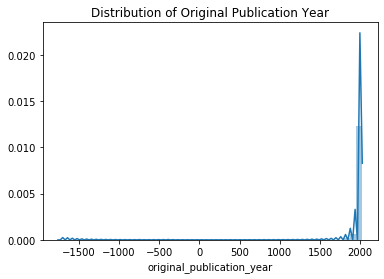

In [42]:
sns.distplot(books['original_publication_year'].dropna())
plt.title('Distribution of Original Publication Year')

There seems to be books that published before 1500 and even with negative value (BC ?). I will check into this.

In [43]:
books[books['original_publication_year'] < 1500]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,cleaned_authors
78,79,1381,1381,3356006,1703,0143039954,9780143039950,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,Ὀδύσσεια,The Odyssey,eng,3.73,670326,710757,8101,29703,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...,homer robert fagles ev rieu frdric mugler bern...
340,341,1371,1371,3293141,1726,0140275363,9780140275360,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",-750.0,Ἰλιάς,The Iliad,eng,3.83,241088,273565,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,homer robert fagles frdric mugler bernard knox
402,403,10534,10534,3200649,1865,1590302257,9781590302260,"Sun Tzu, Thomas Cleary",-500.0,孫子兵法 [Sūnzi bīngfǎ],The Art of War,eng,3.95,167332,203948,6335,2930,11589,48265,70644,70520,https://images.gr-assets.com/books/1453417993m...,https://images.gr-assets.com/books/1453417993s...,sun tzu thomas cleary
530,531,52357,52357,189503,601,0393320979,9780393320980,"Unknown, Seamus Heaney",975.0,Beowulf,Beowulf,en-US,3.42,155903,184187,5098,12256,25619,56758,51660,37894,https://images.gr-assets.com/books/1327878125m...,https://images.gr-assets.com/books/1327878125s...,unknown seamus heaney
645,646,2696,2696,986234,634,0140424385,9780140424390,"Geoffrey Chaucer, Nevill Coghill",1390.0,Tales of Caunterbury,The Canterbury Tales,eng,3.48,148480,158661,2615,6795,19618,52875,48893,30480,https://images.gr-assets.com/books/1261208589m...,https://images.gr-assets.com/books/1261208589s...,geoffrey chaucer nevill coghill
771,772,30289,30289,1625515,842,0140449140,9780140449140,"Plato, Desmond Lee",-380.0,Πολιτεία,The Republic,eng,3.90,110274,122747,2261,2772,7531,29394,42284,40766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,plato desmond lee
823,824,1554,1554,3098166,498,1580495931,9781580495940,"Sophocles, J.E. Thomas",-430.0,Οἰδίπους Τύραννος,"Oedipus Rex (The Theban Plays, #1)",eng,3.67,119496,134384,2129,3032,12324,42020,45436,31572,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,sophocles je thomas
976,977,15645,15645,2377563,856,0812970063,9780812970070,"Dante Alighieri, Anthony M. Esolen",1320.0,Inferno,Inferno (The Divine Comedy #1),NaN,3.99,87511,109200,3576,1930,6267,23308,37680,40015,https://images.gr-assets.com/books/1333579470m...,https://images.gr-assets.com/books/1333579470s...,dante alighieri anthony m esolen
1098,1099,57854,67896,100074,1265,0679776192,9780679776190,"Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...",-300.0,道德經 [dào dé jīng],Tao Te Ching,eng,4.31,39863,80961,3165,903,2332,10967,22924,43835,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,lao tzu giafu feng jane english chungliang al ...
1119,1120,21348,21348,868263,942,0192840509,9780192840510,"Aesop, Laura Harris, Laura Gibbs",-560.0,Aesopica,Aesop's Fables,eng,4.05,88508,98962,1441,773,3717,22587,34885,37000,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,aesop laura harris laura gibbs


After checking into some resources, some of these books are actually first published before Christ (BC) hence the negative value. There were still some books without original publication year. I will look into this.

In [44]:
# Books without original publication year
books[books['original_publication_year'].isna()]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,cleaned_authors
219,220,3609760,3609760,3652511,20,0316043133,9780316043140,Mark Cotta Vaz,NaN,Twilight: The Complete Illustrated Movie Compa...,Twilight: The Complete Illustrated Movie Compa...,en-US,4.23,291411,291899,532,6862,11019,48008,67939,158071,https://images.gr-assets.com/books/1352539022m...,https://images.gr-assets.com/books/1352539022s...,mark cotta vaz
975,976,90072,90072,24501333,3,0793551617,9780793551610,"Robert Kapilow, Dr. Seuss",NaN,NaN,"Dr. Seuss's Green Eggs and Ham: For Soprano, B...",NaN,4.44,90574,90691,262,803,1943,10781,20483,56681,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,robert kapilow dr seuss
3505,3506,856917,856917,3874446,9,1421500167,9781421500160,Yuu Watase,NaN,絶対彼氏 (Zettai Kareshi) 1,"Absolute Boyfriend, Vol. 1",eng,4.01,29385,29550,400,1197,2156,5661,6559,13977,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,yuu watase
4228,4229,36,36,4414,12,0618391002,9780618391000,"Chris Smith, Christopher Lee, Richard Taylor",NaN,The Lord of the Rings: Weapons and Warfare,The Lord of the Rings: Weapons and Warfare,eng,4.53,18788,18911,49,297,282,1556,3743,13033,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,chris smith christopher lee richard taylor
4247,4248,8724779,8724779,13597737,1,0312530641,9780312530650,"P.C. Cast, Kristin Cast",NaN,NaN,Marked / Betrayed / Chosen / Untamed / Hunted ...,eng,4.43,20578,20578,77,471,648,2118,3645,13696,https://images.gr-assets.com/books/1347018756m...,https://images.gr-assets.com/books/1347018756s...,pc cast kristin cast
4409,4410,349254,349254,17150,10,0618390979,9780618390980,Jude Fisher,NaN,NaN,The Lord of the Rings: The Return of the King:...,eng,4.59,17526,17641,28,157,202,1259,3458,12565,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,jude fisher
4707,4708,9832370,9832370,27881851,1,NaN,NaN,BookRags,NaN,NaN,BookRags Summary: A Storm of Swords,eng,4.59,18960,18960,92,278,151,877,4460,13194,https://images.gr-assets.com/books/1369340463m...,https://images.gr-assets.com/books/1369340463s...,bookrags
4770,4771,5171894,5171894,5238959,50,0061231401,9780061231410,James Rollins,NaN,NaN,"The Doomsday Key (Sigma Force, #6)",en-US,4.16,19510,21831,864,169,555,3623,8819,8665,https://images.gr-assets.com/books/1340970015m...,https://images.gr-assets.com/books/1340970015s...,james rollins
4877,4878,17733861,17733861,24809815,11,NaN,NaN,Bella Forrest,NaN,NaN,"A Shade of Blood (A Shade of Vampire, #2)",eng,4.01,24757,25111,1302,437,1315,5250,8685,9424,https://images.gr-assets.com/books/1365199807m...,https://images.gr-assets.com/books/1365199807s...,bella forrest
5609,5610,1044141,1044141,1673783,68,0743287932,9780743287940,Stephen R. Covey,NaN,NaN,The 8th Habit: From Effectiveness to Greatness,en-US,3.99,13765,14396,330,319,789,2989,4904,5395,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,stephen r covey


One thing that I noticed that most of the books without original publication year have their original title also missing. This makes sense since there was no information when a particular book first published so that its original title was also unknown. I will keep these missing values. Last, I will change the data type to omit the '.0' in the end of each year and changing negative year by adding 'BC'.

In [45]:
# Changing data types into integer
books['original_publication_year'].replace(np.nan, 0, inplace = True)
books['original_publication_year'] = books['original_publication_year'].astype('int64')
books['original_publication_year'].replace(0, '-', inplace = True)

In [46]:
# Adding 'BC' for negative year
def change_type(data):
    try:
        if int(data) < 0:
            return str(abs(int(data))) + ' BC'
        elif int(data) > 0:
            return data
    except:
        return data

books['original_publication_year'] = books['original_publication_year'].apply(change_type)

In [47]:
# Checking unique value of 'original_publication_year' feature
books['original_publication_year'].unique()

array([2008, 1997, 2005, 1960, 1925, 2012, 1937, 1951, 2000, 1813, 2003,
       2011, 1949, 1945, 1947, 2009, 1999, 1954, 2010, 2002, 1998, 2007,
       1595, 1988, 1993, 1950, 1996, 2006, 1868, 1847, 2001, 1953, 1974,
       1979, 1932, 1884, 1952, 2015, 1995, 2004, 1969, 1936, 1985, 1818,
       1977, 1811, '720 BC', 1946, 1859, 1990, 1964, 1989, 1958, 1973,
       1967, 1911, 1891, 1897, 1963, 1844, 2013, 1862, 1961, 1876, 1962,
       1955, 1991, 1600, 1965, 1939, 1908, 1850, 2014, 1606, 1860, 1942,
       1978, 1815, 1877, 1986, 1866, 1922, 1987, 1851, 1982, 1843, 1976,
       1994, 1915, 1956, '-', 1980, 1865, 1817, 1957, 1926, 1943, 1938,
       1966, 1981, 2016, 1992, 1984, 1972, 1882, 1895, 1899, 1983,
       '750 BC', 1900, 1975, 1971, 1603, 1929, 1968, 1838, 1903, 1886,
       1940, '500 BC', 1887, 1931, 1611, 1814, 1719, 1513, 1880, 1923,
       1869, 1849, 1892, 1904, 1726, 1598, 975, 1905, 1935, 1948, 1856,
       1759, 1959, 1605, 1901, 1970, 1902, 1390, 1852, 1909, 1920

### 2.2.6. Original Title, Title

Looking on the data summary, there were several missing values within 'original_title' feature. I will look into this.

In [48]:
# Looking into books without original title
books[books['original_title'].isna()]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,cleaned_authors
74,75,227443,227443,3185154,193,014028009X,9780140280100,Helen Fielding,1996,NaN,"Bridget Jones's Diary (Bridget Jones, #1)",eng,3.75,736498,754498,8157,28973,59309,198555,254836,212825,https://images.gr-assets.com/books/1292060045m...,https://images.gr-assets.com/books/1292060045s...,helen fielding
142,143,18143977,18143977,25491300,139,1476746583,9781476746590,Anthony Doerr,2014,NaN,All the Light We Cannot See,eng,4.31,470001,547827,53413,6209,14527,61020,185239,280832,https://images.gr-assets.com/books/1451445646m...,https://images.gr-assets.com/books/1451445646s...,anthony doerr
209,210,345627,345627,335933,132,159514174X,9781595141740,Richelle Mead,2007,NaN,"Vampire Academy (Vampire Academy, #1)",en-US,4.14,248283,455151,19720,12535,22043,73357,129382,217834,https://images.gr-assets.com/books/1361098973m...,https://images.gr-assets.com/books/1361098973s...,richelle mead
214,215,9969571,9969571,14863741,112,030788743X,9780307887440,Ernest Cline,2011,NaN,Ready Player One,eng,4.31,349423,421819,52120,5150,12928,48285,134107,221349,https://images.gr-assets.com/books/1500930947m...,https://images.gr-assets.com/books/1500930947s...,ernest cline
256,257,13023,13023,2933712,4,0517223627,9780517223630,"Jane Carruth, Lewis Carroll, Rene Cloke",1865,NaN,Alice in Wonderland,eng,4.03,343252,343271,4876,7467,18101,70170,109730,137803,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,jane carruth lewis carroll rene cloke
298,299,7933292,7933292,11283577,69,0849946158,9780849946160,"Todd Burpo, Lynn Vincent",2010,NaN,Heaven is for Real: A Little Boy's Astounding ...,eng,4.01,228371,243018,14378,9291,15024,44510,68399,105794,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,todd burpo lynn vincent
323,324,16068905,16068905,21861351,80,NaN,NaN,Rainbow Rowell,2013,NaN,Fangirl,eng,4.12,340379,371730,39353,8626,16973,60097,121431,164603,https://images.gr-assets.com/books/1499565420m...,https://images.gr-assets.com/books/1499565420s...,rainbow rowell
338,339,32929,32929,1086867,98,0060775858,9780060775860,"Margaret Wise Brown, Clement Hurd",1947,NaN,Goodnight Moon,en-US,4.27,244842,252678,4604,4998,10298,37146,59629,140607,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,margaret wise brown clement hurd
463,464,1923820,1923820,6405906,1449,NaN,NaN,Anonymous,1611,NaN,Holy Bible: King James Version,eng,4.43,159457,171594,4438,10011,6802,11712,14338,128731,https://images.gr-assets.com/books/1313518530m...,https://images.gr-assets.com/books/1313518530s...,anonymous
503,504,11422,11422,820210,63,1590525132,9781590525140,Francine Rivers,1991,NaN,Redeeming Love,eng,4.48,157506,163637,9147,2949,4277,13328,33009,110074,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,francine rivers


Looking at the data above, I did not see any pattern to books not having original title. I will keep these missing values. Same as the 'authors' feature, I will clean the 'title' feature since I will use this feature for the content-based recommendation. I only use the title since all the titles are in English while some of the original titles are in other languages such as Arabic, Japanese, etc.

In [49]:
# Text cleaning for 'title' feature
books['cleaned_title'] = books['title'].apply(clean_text)
books[['title', 'cleaned_title']]

,title,cleaned_title
0,"The Hunger Games (The Hunger Games, #1)",the hunger games the hunger games 1
1,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter and the sorcerers stone harry pot...
2,"Twilight (Twilight, #1)",twilight twilight 1
3,To Kill a Mockingbird,to kill a mockingbird
4,The Great Gatsby,the great gatsby
5,The Fault in Our Stars,the fault in our stars
6,The Hobbit,the hobbit
7,The Catcher in the Rye,the catcher in the rye
8,"Angels & Demons (Robert Langdon, #1)",angels demons robert langdon 1
9,Pride and Prejudice,pride and prejudice


### 2.2.7 Language Code

In [50]:
# Looking into unique values within 'language_code' feature
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [51]:
# Looking into data with missing language code
books[books['language_code'].isna()]['title']

44                                             Life of Pi
131                    The Five People You Meet in Heaven
203                                     A Christmas Carol
236                                                Carrie
287     The Hunt for Red October (Jack Ryan Universe, #4)
320                              Where the Red Fern Grows
408         Fried Green Tomatoes at the Whistle Stop Cafe
412                                  The Three Musketeers
464                                          In Her Shoes
486                                  The Andromeda Strain
552                                        Needful Things
604                Are You There, Vodka? It's Me, Chelsea
639                                                  Prey
737     Mrs. Frisby and the Rats of NIMH (Rats of NIMH...
739      The Little House Collection (Little House, #1-9)
740               The Girls' Guide to Hunting and Fishing
786                                      Sh*t My Dad Says
789     The Fo

Looking at titles, I assume that most of the books have english as the language. However, for this project, I will keep these missing values.

### 2.2.8. Ratings

I will look into distribution of ratings of all books.

Text(0.5, 1.0, 'Rating Distribution of Books')

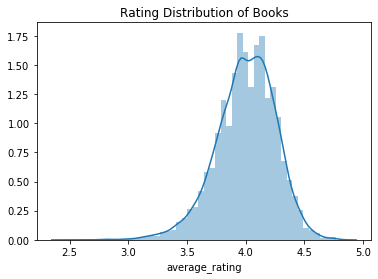

In [52]:
# Rating distribution of books
sns.distplot(books['average_rating'])
plt.title('Rating Distribution of Books')

From the chart above, it seems that most of the books have rating between 3.5 and 4.5. The lowest book rating is around 2.5.

There are 2 ratings in our data namely 'ratings_count' and 'work_ratings_count'. Ratings count are total users that give ratings for a particular title. Work ratings count are total users that give ratings for a title on all editions (one work). I will look if sum of the ratings will be equal to 'ratings_count' or 'work_ratings_count' feature.

In [53]:
pd.concat([books[['ratings_count', 'work_ratings_count']],
           books['ratings_1'] + books['ratings_2'] + books['ratings_3'] + books['ratings_4'] + books['ratings_5']], 
          axis = 1)

,ratings_count,work_ratings_count,0
0,4780653,4942365,4942365
1,4602479,4800065,4800065
2,3866839,3916824,3916824
3,3198671,3340896,3340896
4,2683664,2773745,2773745
5,2346404,2478609,2478609
6,2071616,2196809,2196809
7,2044241,2120637,2120637
8,2001311,2078754,2078754
9,2035490,2191465,2191465


From the table above, it seems that ratings 1 - 5 is equal to work ratings count.

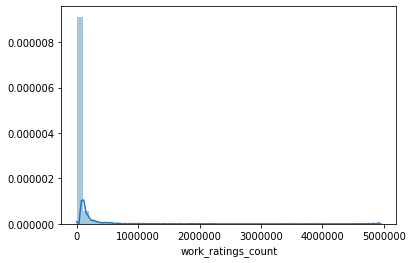

In [54]:
# Distribution of work ratings count on each book
sns.distplot(books['work_ratings_count'])

From the chart above, it seems that most of the books have ratings count of approximately 100,000.

## 2.3. Ratings Data

In [55]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


In [56]:
ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [57]:
# Looking into missing values in the data
ratings.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [58]:
# Total unique value on each feature
print(f'Total ratings given are {len(ratings)}')
ratings.nunique()

Total ratings given are 5976479


user_id    53424
book_id    10000
rating         5
dtype: int64

From the summary above, we can infer that there are almost 6 million ratings given to 10,000 books by more than 50,000 users. Ratings are from 1 - 5.

Text(0.5, 1.0, 'Distribution of Ratings given by User')

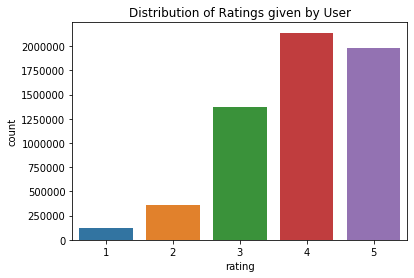

In [59]:
# Distribution of ratings given by user
sns.countplot(ratings['rating'])
plt.title('Distribution of Ratings given by User')

Most of the users gave ratings of 4 or 5. This finding is in line with previous chart that most of the books have ratings between 3.5 and 4.5. Next, I look into how many books in average rated by one user.

Text(0.5, 1.0, 'Distribution of Books Count Rated by One User')

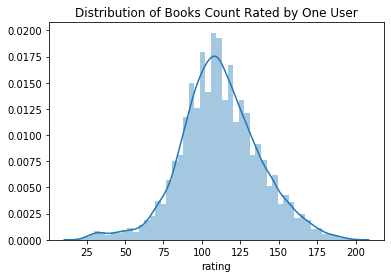

In [60]:
# Distribution of books count that has been rated by one specific user
ratings_per_user = ratings.groupby('user_id').count()['rating'] 
sns.distplot(ratings.groupby('user_id').count()['rating'])
plt.title('Distribution of Books Count Rated by One User')

From the chart above, it seems that most of the users rated around 100 - 125 books. Next, I will check rating counts for each book.

Text(0.5, 1.0, 'Distribution of User Count Rating One Book')

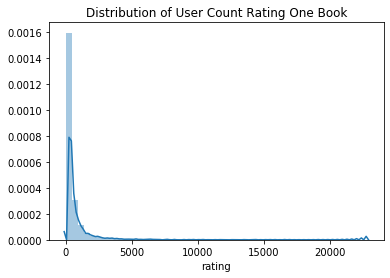

In [61]:
# Distribution of user count that has rated one specific book
ratings_per_book = ratings.groupby('book_id').count()['rating'] 
sns.distplot(ratings_per_book)
plt.title('Distribution of User Count Rating One Book')

From the chart above, it seems that most of the books were rated by less than 2000 users.

## 2.4. Tags Data

In [62]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [63]:
tags.describe()

,tag_id
count,34252.000000
mean,17125.500000
std,9887.845047
min,0.000000
25%,8562.750000
50%,17125.500000
75%,25688.250000
max,34251.000000


In [64]:
tags.describe(exclude = 'number')

,tag_name
count,34252
unique,34252
top,jennifer-cruise
freq,1


In [65]:
# Looking for missing values
tags.isna().sum()

tag_id      0
tag_name    0
dtype: int64

## 2.5. To Read Data

In [66]:
to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


In [67]:
to_read.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


In [68]:
# Looking into missing values
to_read.isna().sum()

user_id    0
book_id    0
dtype: int64

In [69]:
# Total unique value of each feature
to_read.nunique()

user_id    48871
book_id     9986
dtype: int64

From the total unique value of each feature, it seems that around 4000s users never tagged a book to be read in near future and only 14 books from our data that never tagged by users. I try to look how many books on average tagged as 'to_read' by each user.

Text(0.5, 1.0, "Distribution of Books Tagged by User as 'to read'")

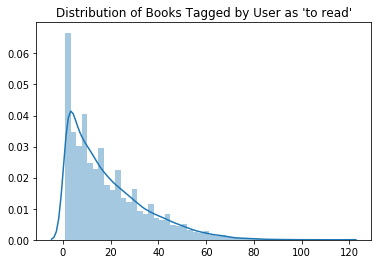

In [70]:
# Distribution of books count tagged by one specific user as 'to read'
sns.distplot(to_read.groupby('user_id').count())
plt.title("Distribution of Books Tagged by User as 'to read'")

Most of the users wanted to read 1 - 10 books. There were also users that wanted to read up to 120 books. Next, I try to look book titles and ratings having most 'to_read' tags.

In [71]:
# Making dataframe consist of books tagged as 'to read'
data_to_read = pd.DataFrame(to_read['book_id'].value_counts()).reset_index()
data_to_read.rename(columns = {'index': 'book_id', 'book_id': 'to_read_count'}, inplace = True)
book_to_read = pd.merge(data_to_read, books[['book_id', 'title', 'average_rating']], on = 'book_id')
book_to_read.head()

,book_id,to_read_count,title,average_rating
0,47,2772,The Book Thief,4.36
1,143,1967,All the Light We Cannot See,4.31
2,113,1840,Catch-22,3.98
3,13,1812,1984,4.14
4,11,1767,The Kite Runner,4.26


# 3. Data Merging

In summary, for our recommendation system, there are 53,424 users that rates 10,000 books. For this project, I will not use all data due to limitation of hardware and to prevent 'MemoryError'. I will only use users that have rated more than 125 books and books that have been rated by more than 50,000 users (based on the original data).  

## 3.1. Ratings

For users, I will only use data of users which have rated more than 150 books.

In [72]:
# Filtering data to only include users which have rated more than 150 books
ratings_per_user_new = ratings_per_user[ratings_per_user > 150]
print(f'In total, there are {len(ratings_per_user_new)} users which have rated more than 150 books')

In total, there are 4011 users which have rated more than 150 books


We have reduced total users from 53,424 to 4,011. I will merge this data into ratings

In [73]:
# Merging ratings with ratings_per_user_new
ratings_ml = pd.merge(ratings, pd.Series(ratings_per_user_new.index), on = 'user_id')
ratings_ml.head()

,user_id,book_id,rating
0,75,3254,2
1,75,6777,5
2,75,11,5
3,75,372,4
4,75,476,3


## 3.2. Books

For books, I will only use data of items (books) which have been rated by more than 1,500 users (of our original 53,424 users)

In [74]:
# Filtering data to only include books which have been rated by more than 1,500 users
ratings_per_book_new = ratings_per_book[ratings_per_book > 1500]
print(f'In total, there are {len(ratings_per_book_new)} books which have been rated by more than 1,500 existing users')

In total, there are 762 books which have been rated by more than 1,500 existing users


We have reduced total books from 10,000 to 762. I will merge this data into ratings_ml to drop any ratings that were given to deleted books

In [75]:
# Merging ratings_ml with ratings_per_book_new
ratings_ml = pd.merge(ratings_ml, pd.Series(ratings_per_book_new.index), on = 'book_id')
ratings_ml.head()

,user_id,book_id,rating
0,75,11,5
1,143,11,5
2,230,11,5
3,247,11,5
4,256,11,4


In [76]:
# Merging books with ratings_per_book_new
books_ml = pd.merge(books, pd.Series(ratings_per_book_new.index), on = 'book_id')
books_ml.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,cleaned_authors,cleaned_title
0,1,2767052,2767052,2792775,272,0439023483,9780439023480,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,suzanne collins,the hunger games the hunger games 1
1,2,3,3,4640799,491,0439554934,9780439554930,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,jk rowling mary grandpr,harry potter and the sorcerers stone harry pot...
2,3,41865,41865,3212258,226,0316015849,9780316015840,Stephenie Meyer,2005,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,stephenie meyer,twilight twilight 1
3,4,2657,2657,3275794,487,0061120081,9780061120080,Harper Lee,1960,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,harper lee,to kill a mockingbird
4,5,4671,4671,245494,1356,0743273567,9780743273560,F. Scott Fitzgerald,1925,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,f scott fitzgerald,the great gatsby


## 3.3. Book Tags & Tags

For book tags, I will merge book_tag into books_ml to drop any tags that were given to deleted books. I will also change 'goodreads_book_id' with 'book_id' so that the primary key of this dataset is the same with ratings dataset.

In [77]:
# Merging book_tag with books and tag
book_tag_ml = pd.merge(books_ml[['book_id', 'goodreads_book_id']], book_tag, on = 'goodreads_book_id').drop(columns = ['goodreads_book_id'])
book_tag_ml = pd.merge(book_tag_ml, tags, on= 'tag_id')
book_tag_ml.head()

,book_id,tag_id,count,tag_name
0,1,11557,50755,favorites
1,2,11557,48220,favorites
2,3,11557,11782,favorites
3,4,11557,30903,favorites
4,5,11557,20851,favorites


Next, I will look into 5 most popular tags for each book and merge it with books_ml

In [78]:
# Looking for top-5 tags for each book
data_tag = list()

for i in book_tag_ml['book_id'].unique():
    top_5_tags = book_tag_ml[book_tag_ml['book_id'] == i].sort_values(by = 'count',
                                                                    ascending = False).head()['tag_name'].to_list()
    top_5_tags = ', '.join(top_5_tags)
    data_tag.append([i, top_5_tags])

top_5_tags = pd.DataFrame(data_tag, columns = ['book_id', 'top_5_tags'])
top_5_tags.head()

,book_id,top_5_tags
0,1,"favorites, currently-reading, young-adult, fic..."
1,2,"to-read, favorites, fantasy, currently-reading..."
2,3,"young-adult, fantasy, favorites, vampires, ya"
3,4,"classics, favorites, to-read, classic, histori..."
4,5,"classics, favorites, fiction, classic, books-i..."


In [79]:
# Merging books_ml with top_5_tags
books_ml = pd.merge(books_ml, top_5_tags, on = 'book_id')
books_ml.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,cleaned_authors,cleaned_title,top_5_tags
0,1,2767052,2767052,2792775,272,0439023483,9780439023480,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,suzanne collins,the hunger games the hunger games 1,"favorites, currently-reading, young-adult, fic..."
1,2,3,3,4640799,491,0439554934,9780439554930,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,jk rowling mary grandpr,harry potter and the sorcerers stone harry pot...,"to-read, favorites, fantasy, currently-reading..."
2,3,41865,41865,3212258,226,0316015849,9780316015840,Stephenie Meyer,2005,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,stephenie meyer,twilight twilight 1,"young-adult, fantasy, favorites, vampires, ya"
3,4,2657,2657,3275794,487,0061120081,9780061120080,Harper Lee,1960,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,harper lee,to kill a mockingbird,"classics, favorites, to-read, classic, histori..."
4,5,4671,4671,245494,1356,0743273567,9780743273560,F. Scott Fitzgerald,1925,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,f scott fitzgerald,the great gatsby,"classics, favorites, fiction, classic, books-i..."


# 4. Exporting Data

In [80]:
# Filling all missing data
books_ml.fillna(value = '-', inplace = True)
books_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 761
Data columns (total 26 columns):
book_id                      762 non-null int64
goodreads_book_id            762 non-null int64
best_book_id                 762 non-null int64
work_id                      762 non-null int64
books_count                  762 non-null int64
isbn                         762 non-null object
isbn13                       762 non-null object
authors                      762 non-null object
original_publication_year    762 non-null object
original_title               762 non-null object
title                        762 non-null object
language_code                762 non-null object
average_rating               762 non-null float64
ratings_count                762 non-null int64
work_ratings_count           762 non-null int64
work_text_reviews_count      762 non-null int64
ratings_1                    762 non-null int64
ratings_2                    762 non-null int64
ratings_3             

In [81]:
# Exporting data
books_ml.to_csv('datasets/books_ml.csv', index = False)
ratings_ml.to_csv('datasets/ratings_ml.csv', index = False)
book_tag_ml.to_csv('datasets/book_tag_ml.csv', index = False)